## Dataset Information
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

### Attribute Information:

Input variables (based on physicochemical tests):<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 3 and 9)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('wine_quality_data.csv')

In [3]:
dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
dataset.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
dataset.rename(columns={"fixed acidity":"fixed_acidity","volatile acidity":"volatile_acidity","citric acid":"citric_acid","residual sugar":"residual_sugar","free sulfur dioxide":"free_sulfur_dioxide","total sulfur dioxide":"total_sulfur_dioxide"}, inplace=True)

In [6]:
dataset.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
dataset.tail()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
dataset.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [10]:
dataset.isnull().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [11]:
for col,value in dataset.items():
    if col != 'type':
        dataset[col] =  dataset[col].fillna(dataset[col].mean())

In [12]:
dataset.isnull().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

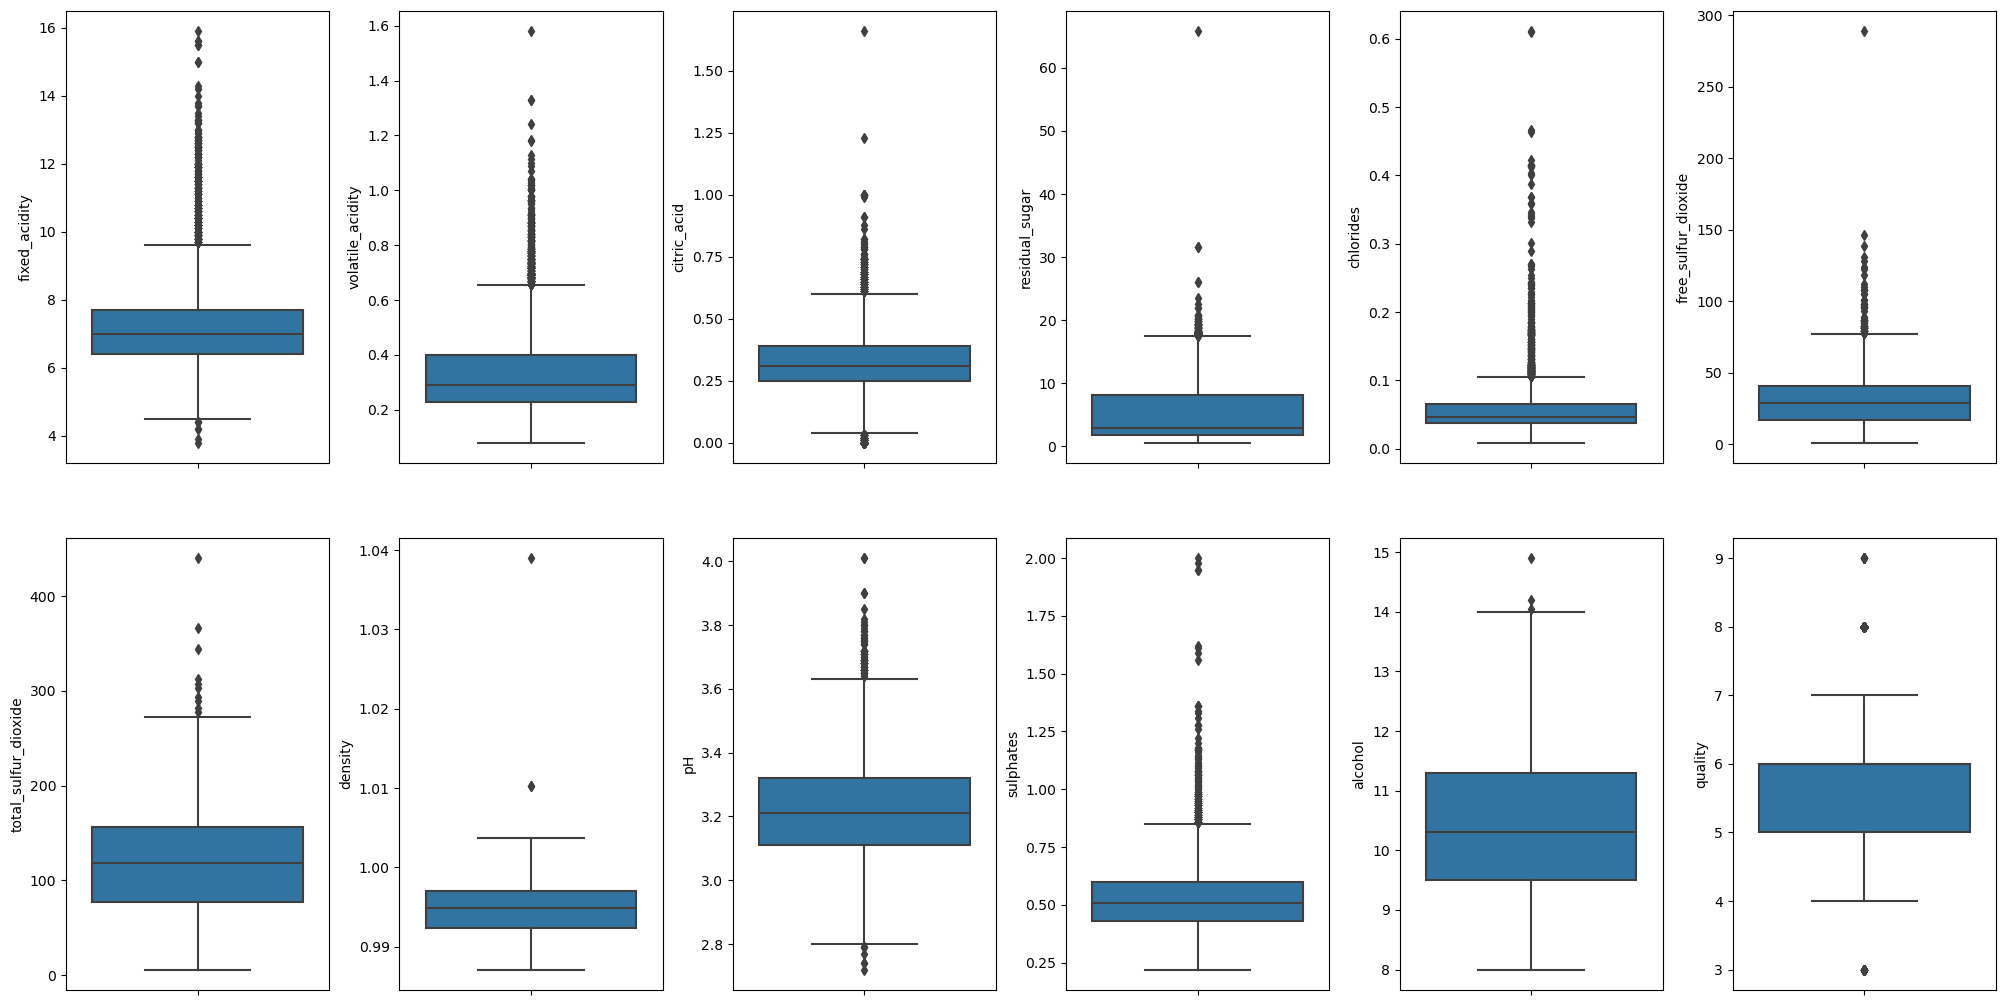

In [13]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in dataset.items():
    if col != 'type':
        sns.boxplot(y=col, data=dataset, ax= ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

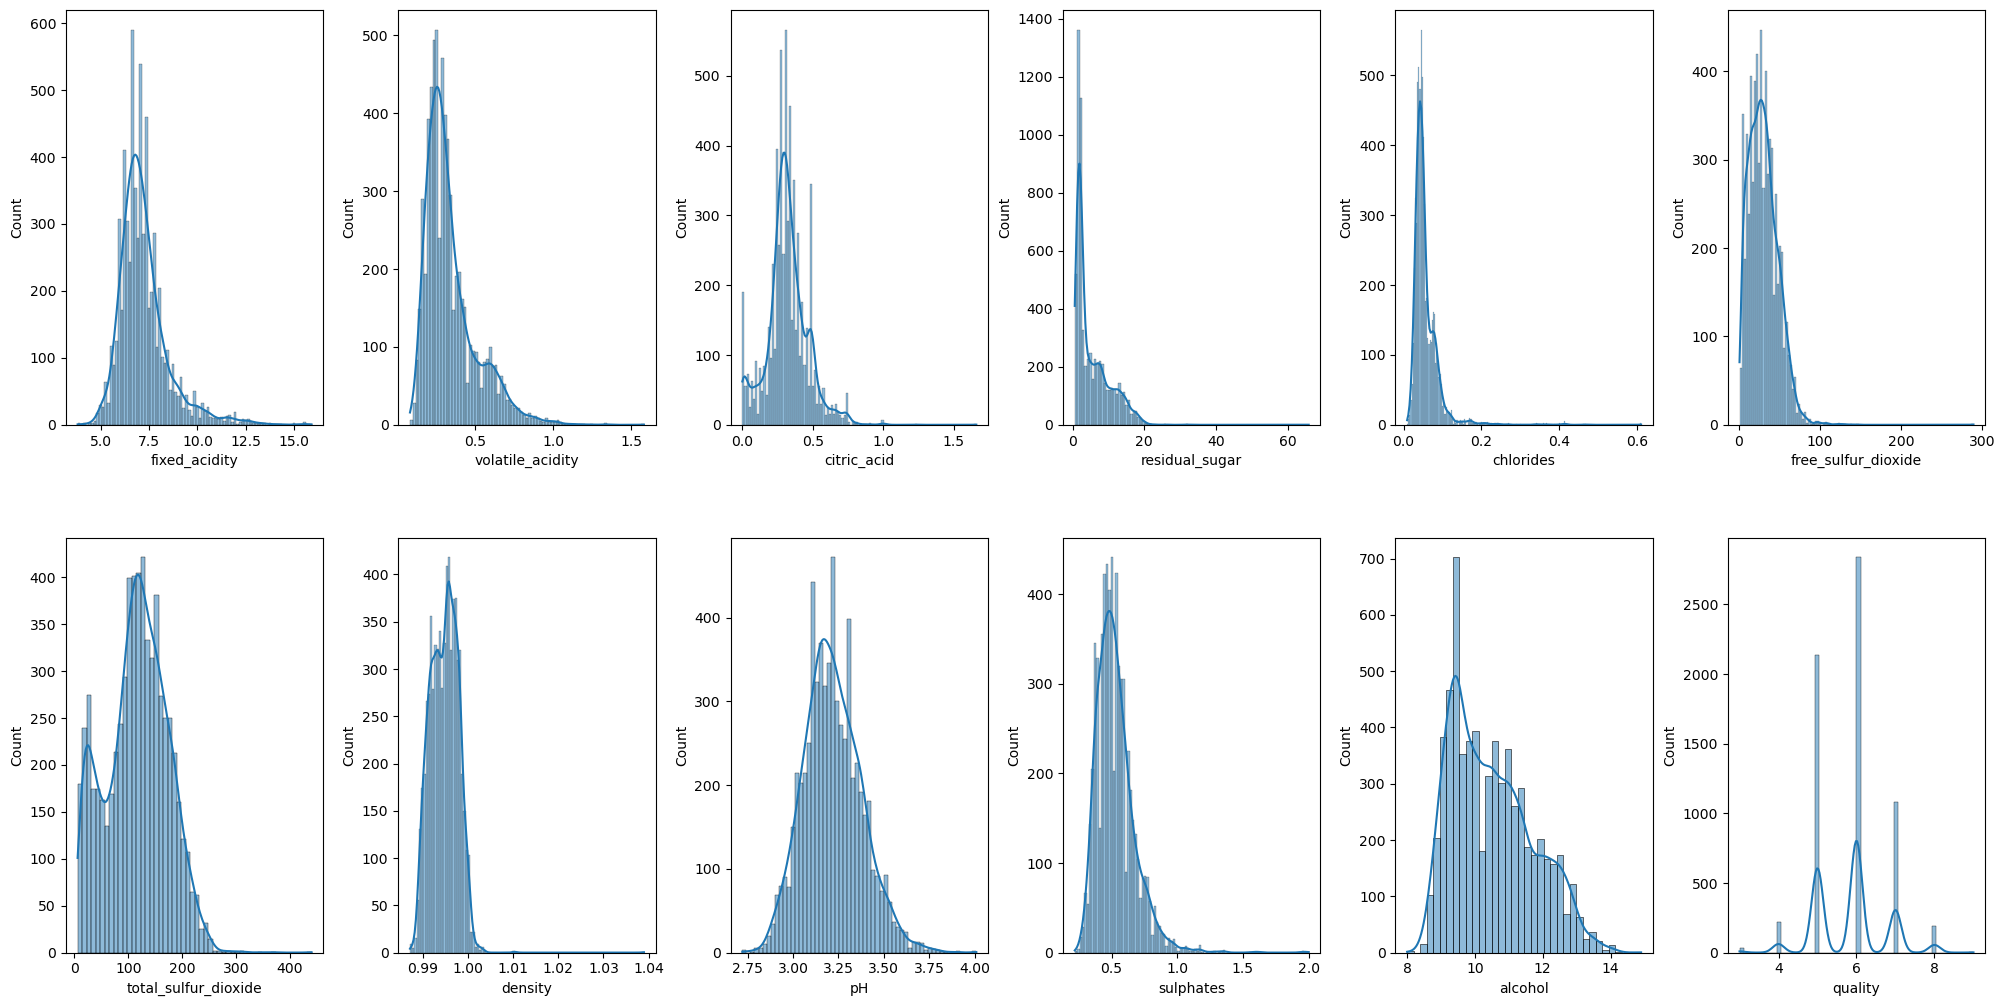

In [14]:
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col,value in dataset.items():
    if col != 'type':
        sns.histplot(data=value, ax= ax[index], kde=True)
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [15]:
dataset['free_sulfur_dioxide'] = np.log(1+dataset['free_sulfur_dioxide'])

<AxesSubplot:xlabel='free_sulfur_dioxide', ylabel='Density'>

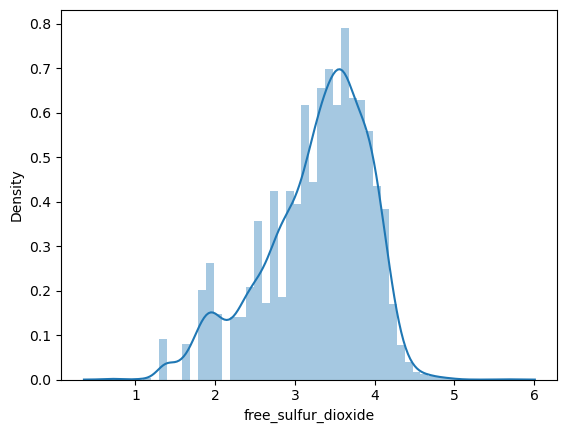

In [16]:
sns.distplot(dataset['free_sulfur_dioxide'])

<AxesSubplot:xlabel='type', ylabel='count'>

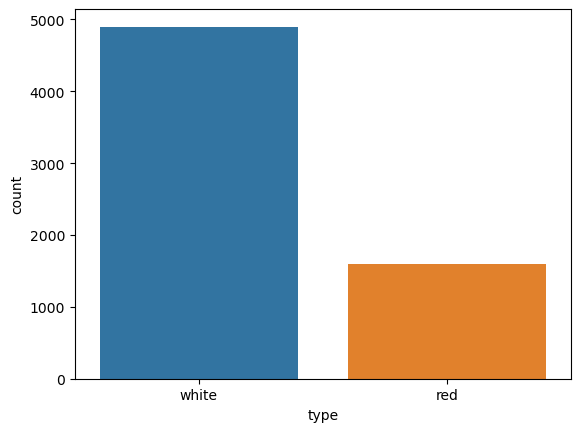

In [17]:
sns.countplot(dataset['type'])

<AxesSubplot:xlabel='quality', ylabel='count'>

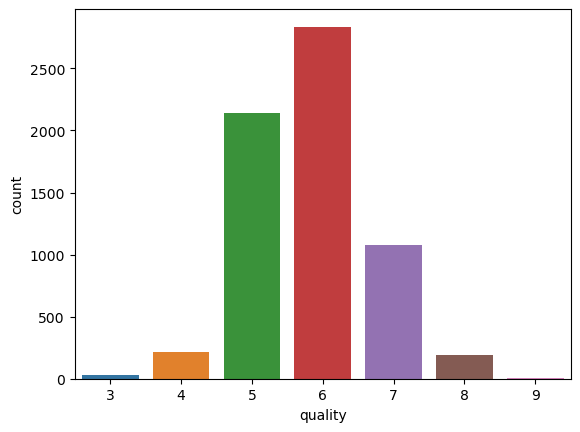

In [18]:
sns.countplot(dataset['quality'])

<AxesSubplot:>

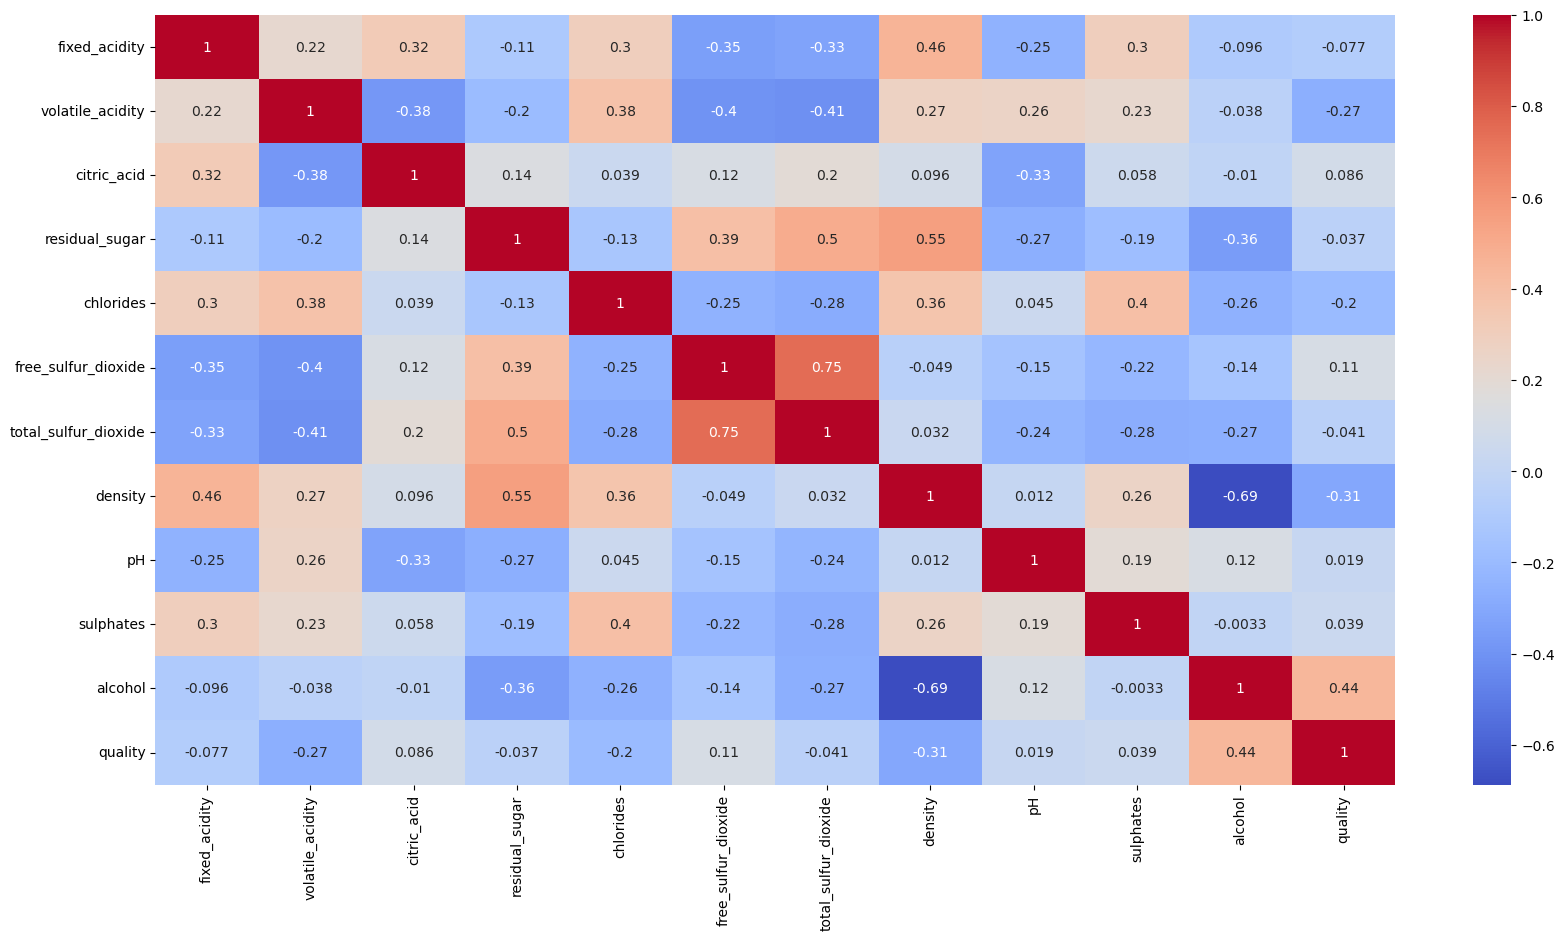

In [19]:
corr = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [20]:
dataset.drop(columns=['density','free_sulfur_dioxide'])

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,170.0,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,132.0,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,97.0,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,186.0,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,44.0,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,51.0,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,40.0,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,44.0,3.57,0.710000,10.2,5


In [21]:
X = dataset.drop(columns=['type','quality'])
y = dataset['quality']

In [22]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
X,y = oversample.fit_resample(X,y)

In [24]:
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

In [25]:
from sklearn.model_selection import cross_val_score,train_test_split

def classify(clf,X,y):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
    clf.fit(X_train,y_train)
    print("Accuracy:", clf.score(X_test,y_test)*100)
    
    score = cross_val_score(clf,X,y,cv=5)
    print("CV Score:",np.mean(score)*100)

In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
classify(clf,X,y)

Accuracy: 33.60870441265364
CV Score: 32.62117860787942


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
classify(clf,X,y)

Accuracy: 81.16058835381826
CV Score: 75.01518756577124


In [28]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
classify(clf,X,y)

Accuracy: 88.53516018537175
CV Score: 82.64158854465656


In [29]:
from sklearn.ensemble import ExtraTreesClassifier
clf = ExtraTreesClassifier()
classify(clf,X,y)

Accuracy: 88.95829135603466
CV Score: 83.69438758454717


In [31]:
import lightgbm
clf = lightgbm.LGBMClassifier()
classify(clf,X,y)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 14889, number of used features: 11
[LightGBM] [Info] Start training from score -1.952987
[LightGBM] [Info] Start training from score -1.940752
[LightGBM] [Info] Start training from score -1.944970
[LightGBM] [Info] Start training from score -1.953935
[LightGBM] [Info] Start training from score -1.944501
[LightGBM] [Info] Start training from score -1.958685
[LightGBM] [Info] Start training from score -1.925896
Accuracy: 87.12472294982874
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000832 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 15881, number of used features: 11
[LightGBM]